<a href="https://colab.research.google.com/github/preethi0525/codsoft-projects-data-science/blob/main/tit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [ ]:
titanicdata = pd.read_csv('/content/Titanic-Dataset.csv')  # Load the data from CSV file into a pandas DataFrame
titanicdata.head()  # Print the first 5 rows



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanicdata.info()  # Get some information about the data
titanicdata.isnull().sum()  # Check the number of missing values in each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanicdata = titanicdata.drop(columns='Cabin', axis=1)  # Drop the "Cabin" column from the DataFrame
titanicdata['Age'].fillna(titanicdata['Age'].mean(), inplace=True)  # Replace missing values in "Age" with the mean
titanicdata['Embarked'].fillna(titanicdata['Embarked'].mode()[0], inplace=True)  # Replace missing values in "Embarked" with the mode
titanicdata.isnull().sum()  # Check the number of missing values in each column again


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
titanicdata.describe()  # Get some statistical measures about the data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanicdata['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

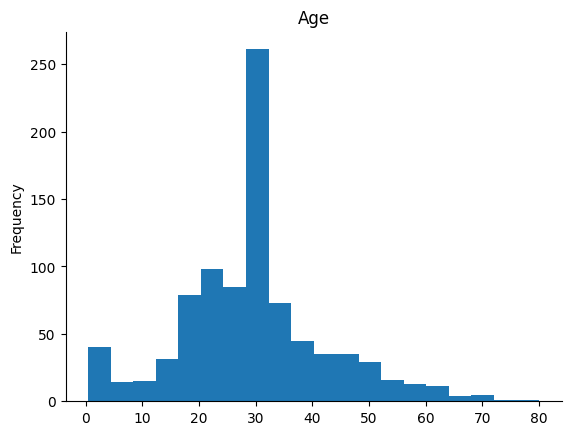

In [ ]:
titanicdata['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


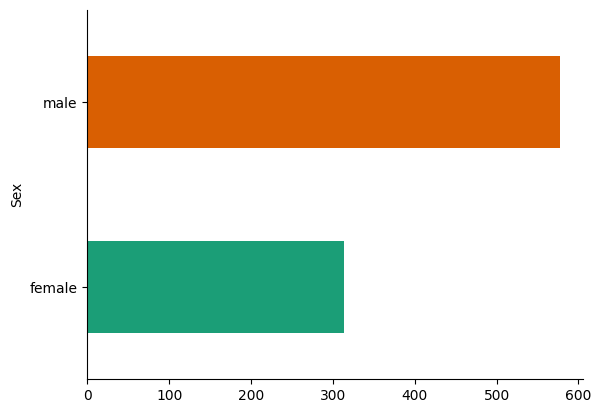

In [ ]:
titanicdata.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


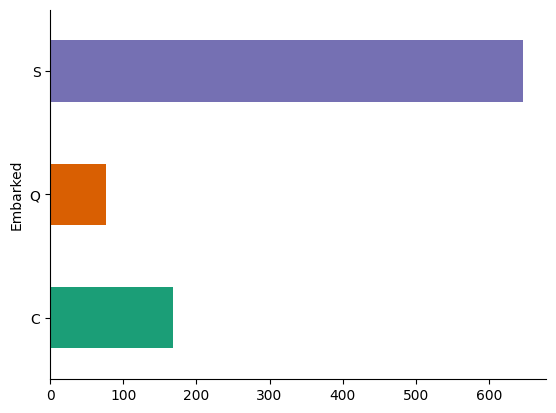

In [ ]:
titanicdata.groupby('Embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


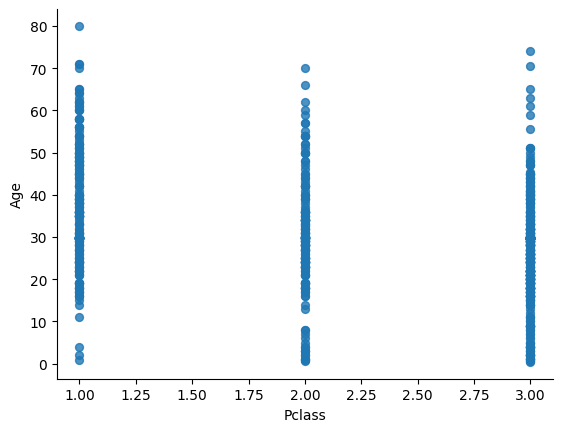

In [ ]:
titanicdata.plot(kind='scatter', x='Pclass', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


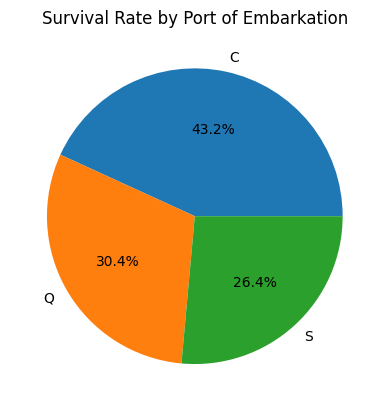

In [ ]:
embarked_survival = titanicdata.groupby('Embarked')['Survived'].mean()
plt.pie(embarked_survival.values, labels=embarked_survival.index, autopct='%1.1f%%')
plt.title('Survival Rate by Port of Embarkation')
plt.show()


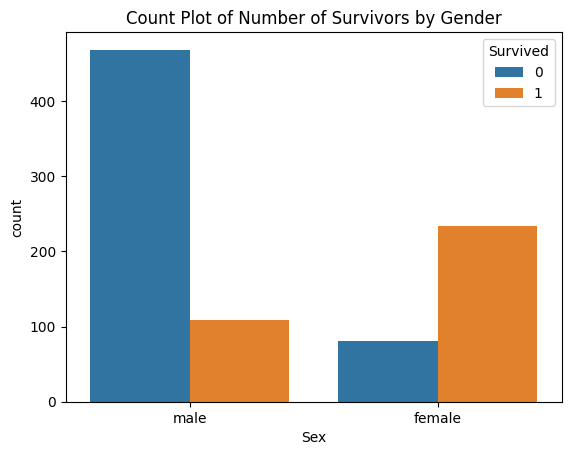

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=titanicdata)
plt.title('Count Plot of Number of Survivors by Gender')
plt.show()


In [ ]:
titanicdata.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [ ]:

X = titanicdata.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)  # Features
Y = titanicdata['Survived']  # Target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)  # Split the data
print(X.shape, X_train.shape, X_test.shape)


(891, 7) (712, 7) (179, 7)


In [ ]:
# Example feature selection (X) and target (y)
from sklearn.impute import SimpleImputer  # Import SimpleImputer
X = titanicdata[['Pclass', 'Sex', 'Age', 'Fare']]  # Adjust the feature columns as needed
y = titanicdata['Survived']

# Convert categorical columns to numeric
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the training set
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

print("Model trained successfully.")


Model trained successfully.


In [ ]:
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)


Accuracy score of test data :  0.7988826815642458


In [ ]:
# Confusion matrix calculation
cm = confusion_matrix(Y_test, X_test_prediction)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[89 16]
 [20 54]]
